### Exercise  1

In a classification tree , the dataset splits accordingly to its variables. In this cenario, you jave two variables, age and income,determining whether someone buys a house. If training data tells us 70 peercent of people over age 30 bought a house , then data gets split there , with age becoming the first node in the tree. This split makes the data 80 percent "oure".The second node then addresses income from there .

In [ ]:

!pip install pandas scikit-learn









In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

df = pd.read_csv("house_classification.csv")

print("Sample Data:\n", df.head())

df_encoded = pd.get_dummies(df, columns=["Income"], drop_first=True)

Sample Data:
    Age  Income Buys_House
0   25     Low         No
1   45    High        Yes
2   35  Medium        Yes
3   28     Low         No
4   40  Medium        Yes


In [ ]:
df_encoded = pd.get_dummies(df, columns=["Income"], drop_first=False)

In [ ]:
X = df_encoded.drop("Buys_House", axis=1)
y = df_encoded["Buys_House"].map({"No": 0, "Yes": 1})

In [ ]:

clf = DecisionTreeClassifier(criterion="entropy", max_depth=2, random_state=42)
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

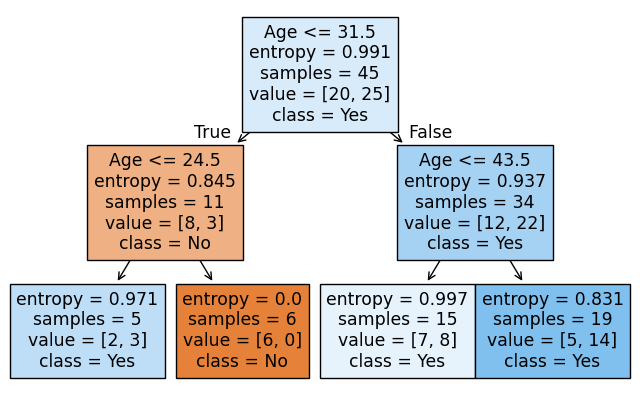

In [ ]:
plt.figure(figsize=(8,5))
plot_tree(clf, feature_names=X.columns, class_names=["No", "Yes"], filled=True)
plt.show()


In [ ]:
cols = X.columns
sample1 = pd.DataFrame([[22,1,0,0]], columns=cols)
print("Age=22, Income=Low    →", "Buys House" if clf.predict(sample1)[0]==1 else "Doesn't Buy House")

sample2 = pd.DataFrame([[28,0,1,0]], columns=cols)
print("Age=28, Income=Medium →", "Buys House" if clf.predict(sample2)[0]==1 else "Doesn't Buy House")

sample3 = pd.DataFrame([[30,0,0,1]], columns=cols)
print("Age=30, Income=High   →", "Buys House" if clf.predict(sample3)[0]==1 else "Doesn't Buy House")

sample4 = pd.DataFrame([[32,1,0,0]], columns=cols)
print("Age=32, Income=Low    →", "Buys House" if clf.predict(sample4)[0]==1 else "Doesn't Buy House")

sample5 = pd.DataFrame([[37,0,1,0]], columns=cols)
print("Age=37, Income=Medium →", "Buys House" if clf.predict(sample5)[0]==1 else "Doesn't Buy House")

sample6 = pd.DataFrame([[45,0,0,1]], columns=cols)
print("Age=45, Income=High   →", "Buys House" if clf.predict(sample6)[0]==1 else "Doesn't Buy House")

sample7 = pd.DataFrame([[55,0,1,0]], columns=cols)
print("Age=55, Income=Medium →", "Buys House" if clf.predict(sample7)[0]==1 else "Doesn't Buy House")

Age=22, Income=Low    → Buys House
Age=28, Income=Medium → Doesn't Buy House
Age=30, Income=High   → Doesn't Buy House
Age=32, Income=Low    → Buys House
Age=37, Income=Medium → Buys House
Age=45, Income=High   → Buys House
Age=55, Income=Medium → Buys House
